# Recognising Handwritten Digits on MNIST Dataset using KNN 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


C:\Users\ajind\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ajind\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\ajind\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Step 1. Data Preparation

In [2]:
df = pd.read_csv(r"C:\Users\ajind\Downloads\mnist\mnist_train.csv")
print(df.shape)

(60000, 785)


In [3]:
print(df.columns)

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)


In [4]:
df.head(n=5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = df.values
print(data.shape)
print(type(data))

(60000, 785)
<class 'numpy.ndarray'>


In [6]:
X = data[:,1:]
Y = data[:,0]

print(X.shape,Y.shape)

(60000, 784) (60000,)


In [7]:
split = int(0.8*X.shape[0])
print(split)

X_train = X[:split,:]
Y_train = Y[:split]

X_test = X[split:,:]
Y_test = Y[split:]

print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

48000
(48000, 784) (48000,)
(12000, 784) (12000,)


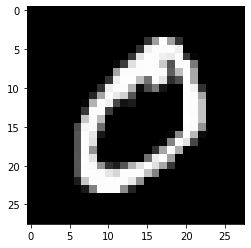

0


In [8]:
#Visualise SOme Samples

def drawImg(sample):
    img = sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()
    
drawImg(X_train[1])
print(Y_train[1])
    
    

### Step 2. K-NN

In [9]:
# Can we apply KNN to this data ?

In [10]:
print(X_test[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 170 226  57   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 226 114   0   0   0  57 198 255 255
  86   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 141 255 255 170 255 255 255 255 255 255  29   0   

In [25]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=67):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    #print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    
    
    

### Step 3 : Make Predictions 

In [26]:
pred = knn(X_train,Y_train,X_test[1])

print(int(pred))

7


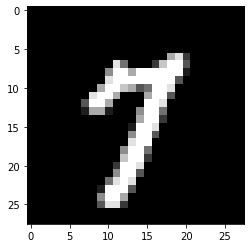

7


In [27]:

drawImg(X_test[1])
print(Y_test[1])

In [33]:
# Write one method which computes accuracy of KNN over the test set !
def get_acc(X_test,Y_test):
    
    y_pred = []
    
    for i in range(2):
        print(X_test[i])
        p = knn(X_train,Y_train,X_test[i])
        y_pred.append(p)
        
    y_pred = np.array(y_pred)

    return  float((y_pred==Y_test).sum())/Y_test.shape[0]

In [34]:
c = get_acc(X_test,Y_test)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0  11 120 183   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 106 146   0
   0   0   0   0   0 128 242 182   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 121 199   4   0   0   0   0   0 140 247  48
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 121
 254   9   0   0   0   0   0 140 245   0   0   0   

<ipython-input-33-ecc8bd07c434>:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return  float((y_pred==Y_test).sum())/Y_test.shape[0]


AttributeError: 'bool' object has no attribute 'sum'

In [ ]:
print(c)